# Part 3: Model Selection

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset

Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

In [2]:
features = ['age', 'hormonal_contraceptives_(years)', 'num_of_pregnancies',
 'first_sexual_intercourse', 'number_of_sexual_partners',
 'hormonal_contraceptives', 'smokes_(years)', 'iud_(years)',
 'smokes_(packs_year)', 'iud', 'dx_hpv', 'stds', 'stds_(number)',
 'stds_number_of_diagnosis', 'smokes' , 'schiller']


df = pd.read_csv('preprocessed_risk_factors_cervical_cancer.csv', usecols = features)
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs_year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,iud_(years),stds,stds_(number),stds_number_of_diagnosis,dx_hpv,schiller
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,34,1.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0,1,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0,0,0


## Split Input and Traget Variables

In [3]:
X = df.drop('schiller', axis = 1) 
y = df['schiller']

In [4]:
X.columns

Index(['age', 'number_of_sexual_partners', 'first_sexual_intercourse',
       'num_of_pregnancies', 'smokes', 'smokes_(years)', 'smokes_(packs_year)',
       'hormonal_contraceptives', 'hormonal_contraceptives_(years)', 'iud',
       'iud_(years)', 'stds', 'stds_(number)', 'stds_number_of_diagnosis',
       'dx_hpv'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (858, 16)
Shape of training dataset: (600, 15)
Shape of testing dataset: (258, 15)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Define Functions

#### Writing a function that returns the evaluation metrics as a DataFrame

In [7]:
def model_comparison(models =[], model_names= []): 
    
    acc = []
    prec = []
    recal = []
    f1_train = []
    f1_test = []
    roc_auc = []
    pr_auc = []
    
    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
        pred_prob = clf.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)

        
        f1_train.append(f1_score(y_hat_train, y_train))
        f1_test.append(f1_score(y_hat, y_test))
        acc.append(accuracy_score(y_hat, y_test))
        prec.append(precision_score(y_hat, y_test))
        recal.append(recall_score(y_hat, y_test))
        roc_auc.append(roc_auc_score(y_test, y_hat))
        pr_auc.append(auc(recall, precision))
        
    compare = pd.DataFrame({'Algorithm' : model_names , 'ROC_AUC': roc_auc, 'PR_AUC': pr_auc, 'Precision': prec, 'Recall': recal, 'F1_Train': f1_train, 'F1_Test': f1_test, 'Accuracy' : acc, })
    return compare

#### Writing a function returns Macro and Weighted average of Recall Score

In [8]:

def macro_weighted(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)

    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)

#### Detailed Macro & Weighted average values of the performance metrics

In [9]:
def macro_weighted_prec_rec(y_test, y_hat):
    
    rec = metrics.recall_score(y_test, y_hat)
    print ("Recall Score:", rec)
    
    rec_mac = metrics.recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", rec_mac)

    rec_wei = metrics.recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", rec_wei)
    
    print ('.')
    
    prec_mac = metrics.precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", prec_mac)

    prec_wei = metrics.precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", prec_wei)

    f1_mac = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", f1_mac)

    f1_wei = metrics.f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", f1_wei)
    
    print ('.')
    
    acc = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy:", acc)

#### Performance of the Tarining & Test Set

In [10]:
def f1_acc(y_test, y_hat, y_train, y_hat_train): 
    
    acc_train = metrics.accuracy_score(y_train, y_hat_train)
    print ("Accuracy Score of Train Set:", acc_train)
    
    acc_test = metrics.accuracy_score(y_test, y_hat)
    print ("Accuracy Score of Test Set:", acc_test)
    
    print ('.')
    
    f1_train = metrics.f1_score(y_train, y_hat_train, average = 'macro')
    print ("F1 Score of Train Set:", f1_train)
    
    f1_test = metrics.f1_score(y_test, y_hat, average = 'macro')
    print ("F1 Score of Test Set:", f1_test)
    
    ax1 = sns.distplot(y_train, hist=False, color='pink', kde_kws={'bw':0.1}, label = 'Train Data')
    sns.distplot(y_hat_train, hist=False, ax=ax1, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Data')
    
    plt.title('Actual vs Predicted Values for Diagnosis (Training Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()
    
    ax2 = sns.distplot(y_test, hist=False, color='salmon', kde_kws={'bw':0.1}, label = 'Test Data')
    sns.distplot(y_hat, hist=False, ax=ax2, color='lightblue', kde_kws={'bw':0.1}, label = 'Predicted Result')
    plt.title('Actual vs Predicted Values for Diagnosis (Test Set)')
    plt.xlabel('Diagnosis')
    plt.ylabel('Proportion of Results')
    plt.legend()
    plt.show()

#### Let's look at the ROC_AUC, Precision Recall AUC and the Confusion Matrices of the top 5 models

In [11]:
def roc_pr_cm(models=[]):
    
    roc_auc = []
    pr_auc = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(X_train, y_train)
        y_hat = clf.predict(X_test)
        y_hat_train = clf.predict(X_train) 
    
        # predict probabilities
        pred_prob = clf.predict_proba(X_test)
    
        # Print the confusion matrix
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(metrics.classification_report(y_test, y_hat, digits=3))
        
        print('---------------------------------------------------------------')
        
        macro_weighted(y_test, y_hat)
        
        print('---------------------------------------------------------------')
     
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:, 1], pos_label=1)
        roc_auc.append(roc_auc_score(y_test, y_hat))
    
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        # plot roc curves
        plt.plot(fpr, tpr, label = models[model])
    
        plt.title('ROC curve where AUC= {}'.format(roc_auc[model]))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show();
    
        # calculate model precision-recall curve
        # precision, recall, _ = precision_recall_curve(y_hat , y_test)
        precision, recall, _ = precision_recall_curve(y_test, pred_prob[:, 1], pos_label=1)
        pr_auc.append(auc(recall, precision))
    
        # plot the model precision-recall curve
        plt.style.use('seaborn')
        plt.figure(figsize=(8, 4))
        plt.plot(recall, precision, marker='.', label = models[model])
        plt.title('Precision Recall curve AUC= {}'.format(pr_auc[model]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='best')
        plt.show()

### Model Selection (a) LazyClassifier

In [12]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
model, predictions = clf.fit(X_train, X_test, y_train, y_test)
model

100%|██████████| 30/30 [00:01<00:00, 27.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.91,0.60,0.60,0.91,0.12
PassiveAggressiveClassifier,0.78,0.59,0.59,0.83,0.01
BaggingClassifier,0.89,0.56,0.56,0.89,0.03
LabelSpreading,0.88,0.56,0.56,0.89,0.03
LabelPropagation,0.88,0.56,0.56,0.89,0.03
QuadraticDiscriminantAnalysis,0.22,0.56,0.56,0.29,0.01
LogisticRegression,0.92,0.55,0.55,0.91,0.01
LinearSVC,0.92,0.55,0.55,0.91,0.04
KNeighborsClassifier,0.92,0.55,0.55,0.91,0.02


### Model Selection (b) Trying out Several Models

In [13]:
# Modelling Algorithms
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import ExtraTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score, confusion_matrix

#### Let's try to model some classifiers for this dataset

In [14]:
models = [LogisticRegression(), AdaBoostClassifier(), BaggingClassifier(), KNeighborsClassifier(), RandomForestClassifier(), BaggingClassifier(RandomForestClassifier()), XGBClassifier(),
        DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB(), CatBoostClassifier(logging_level='Silent'), ExtraTreeClassifier(), LGBMClassifier(), LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis(), EasyEnsembleClassifier(random_state = 25)]

model_names=['LogisticRegression','AdaBoostClassifier', 'BaggingClassifier', 'KNearestNeighbors','RandomForest','BaggingRF', 'XGBoost', 'DecisionTree',
             'GradientBoosting','GaussianNB', 'CatBoost', 'ExtraTree', 'LGBM', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis', 'EasyClassifier']

model_comparison(models, model_names)

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
0,LogisticRegression,0.55,0.11,0.12,0.25,0.29,0.17,0.92
1,AdaBoostClassifier,0.52,0.10,0.06,0.20,0.44,0.10,0.93
2,BaggingClassifier,0.55,0.22,0.12,0.22,0.91,0.16,0.92
3,KNearestNeighbors,0.55,0.14,0.12,0.22,0.32,0.16,0.92
4,RandomForest,0.52,0.19,0.06,0.12,0.98,0.08,0.91
5,BaggingRF,0.50,0.12,0.00,0.00,0.64,0.00,0.93
6,XGBoost,0.53,0.17,0.06,0.33,0.43,0.11,0.93
7,DecisionTree,0.51,0.12,0.12,0.07,0.98,0.09,0.85
8,GradientBoosting,0.55,0.16,0.12,0.25,0.62,0.17,0.92
9,GaussianNB,0.53,0.14,0.94,0.07,0.20,0.12,0.18


#### What are the top 5 models with highest Recall Score? (class 1)

In [15]:
compare = model_comparison(models, model_names)
top5 = compare.nlargest(5,'Precision')
top5

,Algorithm,ROC_AUC,PR_AUC,Precision,Recall,F1_Train,F1_Test,Accuracy
9,GaussianNB,0.53,0.14,0.94,0.07,0.20,0.12,0.18
14,QuadraticDiscriminantAnalysis,0.56,0.18,0.94,0.07,0.22,0.13,0.22
15,EasyClassifier,0.63,0.17,0.69,0.10,0.34,0.17,0.58
11,ExtraTree,0.61,0.26,0.31,0.17,0.98,0.22,0.86
7,DecisionTree,0.53,0.16,0.19,0.09,0.98,0.12,0.83


---------------------------------------------------------------


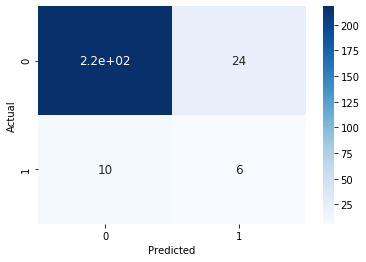

TP: 6, FP: 24, TN: 218, FN: 10
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.956     0.901     0.928       242
           1      0.200     0.375     0.261        16

    accuracy                          0.868       258
   macro avg      0.578     0.638     0.594       258
weighted avg      0.909     0.868     0.886       258

---------------------------------------------------------------
Recall Score: 0.375
Macro Average of Recall Score: 0.6379132231404958
Weighted Average of Recall Score: 0.8682170542635659
---------------------------------------------------------------


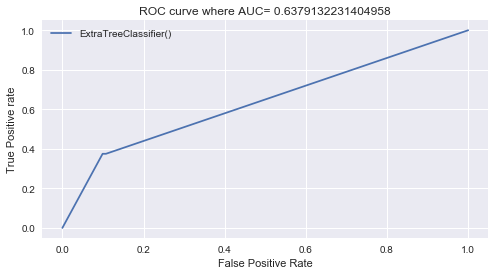

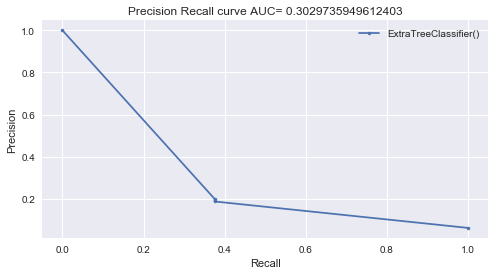

---------------------------------------------------------------


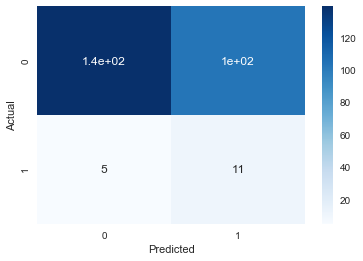

TP: 11, FP: 103, TN: 139, FN: 5
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.965     0.574     0.720       242
           1      0.096     0.688     0.169        16

    accuracy                          0.581       258
   macro avg      0.531     0.631     0.445       258
weighted avg      0.911     0.581     0.686       258

---------------------------------------------------------------
Recall Score: 0.6875
Macro Average of Recall Score: 0.6309400826446281
Weighted Average of Recall Score: 0.5813953488372093
---------------------------------------------------------------


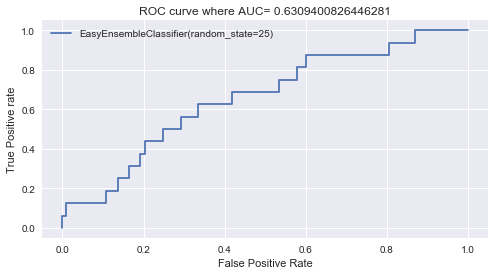

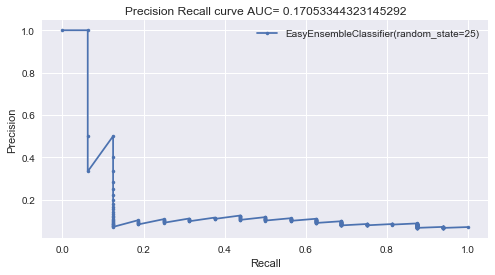

---------------------------------------------------------------


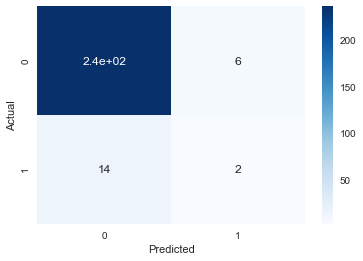

TP: 2, FP: 6, TN: 236, FN: 14
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.944     0.975     0.959       242
           1      0.250     0.125     0.167        16

    accuracy                          0.922       258
   macro avg      0.597     0.550     0.563       258
weighted avg      0.901     0.922     0.910       258

---------------------------------------------------------------
Recall Score: 0.125
Macro Average of Recall Score: 0.5501033057851239
Weighted Average of Recall Score: 0.9224806201550387
---------------------------------------------------------------


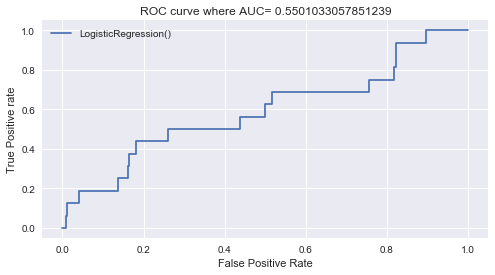

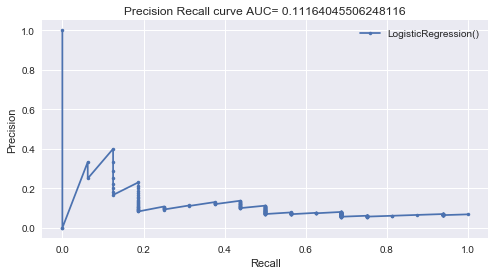

---------------------------------------------------------------


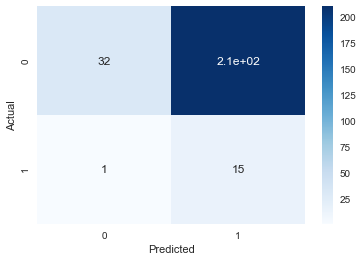

TP: 15, FP: 210, TN: 32, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.970     0.132     0.233       242
           1      0.067     0.938     0.124        16

    accuracy                          0.182       258
   macro avg      0.518     0.535     0.179       258
weighted avg      0.914     0.182     0.226       258

---------------------------------------------------------------
Recall Score: 0.9375
Macro Average of Recall Score: 0.5348657024793388
Weighted Average of Recall Score: 0.1821705426356589
---------------------------------------------------------------


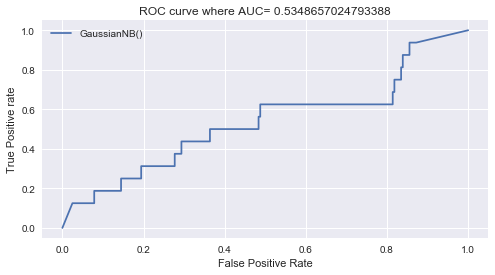

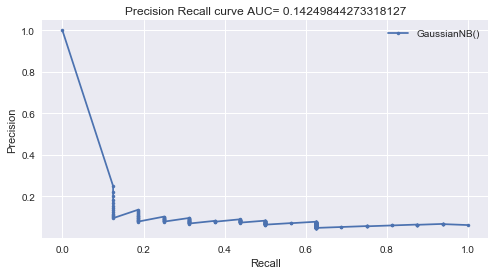

In [16]:
models = [ExtraTreeClassifier(), EasyEnsembleClassifier(random_state = 25), LogisticRegression(), GaussianNB()]
roc_pr_cm(models)

### EasyEnsemble or GaussianNB?

Parameters currently in use:

{'base_estimator': None,
 'n_estimators': 10,
 'n_jobs': None,
 'random_state': 25,
 'replacement': False,
 'sampling_strategy': 'auto',
 'verbose': 0,
 'warm_start': False}
 
Recall Score: 0.6875
Macro Average of Recall Score: 0.6309400826446281
Weighted Average of Recall Score: 0.5813953488372093
.
Macro Average of Precision Score: 0.5308845029239766
Weighted Average of Precision Score: 0.9113995421369963
Macro Average of F1 Score: 0.4447190115583899
Weighted Average of F1 Score: 0.6860381695663056
.
Accuracy: 0.5813953488372093
Accuracy Score of Train Set: 0.65
Accuracy Score of Test Set: 0.5813953488372093
.
F1 Score of Train Set: 0.5507637017070979
F1 Score of Test Set: 0.4447190115583899


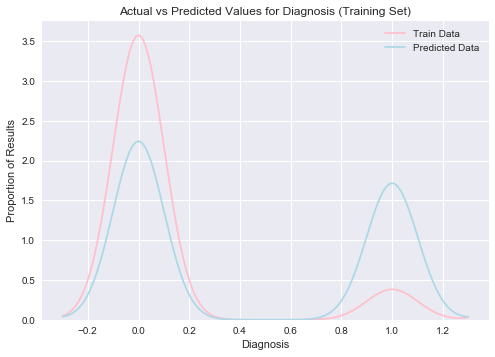

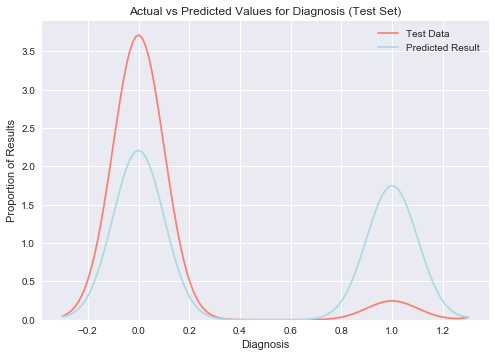

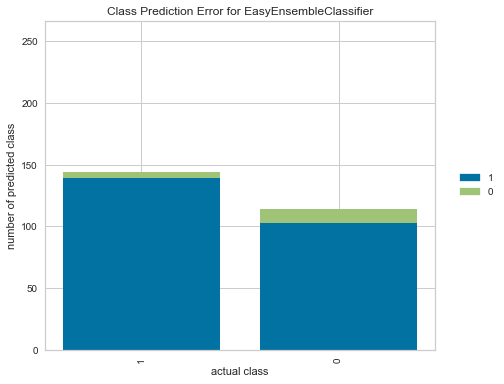

In [17]:
from sklearn import model_selection
from pprint import pprint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =0)

easy = EasyEnsembleClassifier(random_state = 25)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(easy.get_params())

print (' ')

easy.fit(X_train, y_train)
y_hat = easy.predict(X_test)
y_hat_train = easy.predict(X_train)

macro_weighted_prec_rec(y_test, y_hat)

f1_acc(y_test, y_hat, y_train, y_hat_train)

classes = [1, 0]

from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
    EasyEnsembleClassifier(random_state = 25), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}
 
Recall Score: 0.9375
Macro Average of Recall Score: 0.5348657024793388
Weighted Average of Recall Score: 0.1821705426356589
.
Macro Average of Precision Score: 0.5181818181818182
Weighted Average of Precision Score: 0.9136950904392765
Macro Average of F1 Score: 0.17860430026405133
Weighted Average of F1 Score: 0.226014345910129
.
Accuracy: 0.1821705426356589
Accuracy Score of Train Set: 0.245
Accuracy Score of Test Set: 0.1821705426356589
.
F1 Score of Train Set: 0.24242213086196085
F1 Score of Test Set: 0.17860430026405133


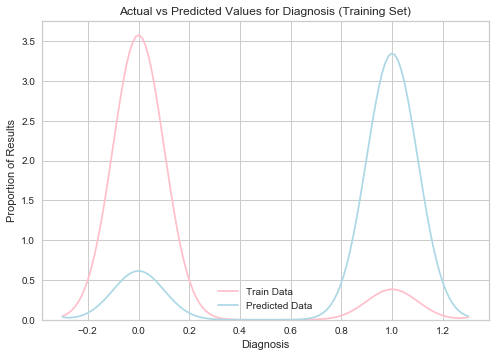

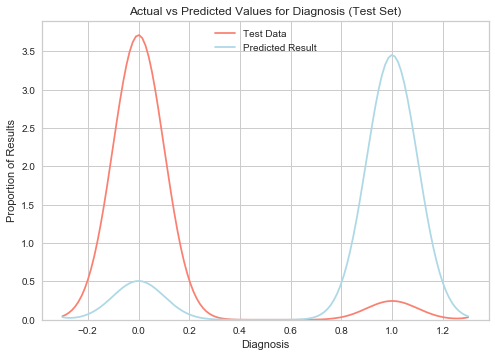

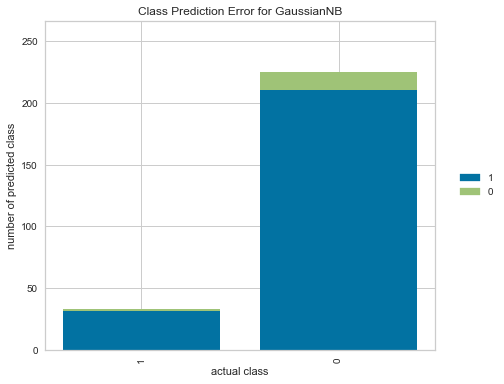

In [18]:
from sklearn import model_selection
from pprint import pprint

dt = GaussianNB()

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

print (' ')

dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)
y_hat_train = dt.predict(X_train)

macro_weighted_prec_rec(y_test, y_hat)

f1_acc(y_test, y_hat, y_train, y_hat_train)

classes = [1, 0]

from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(
   GaussianNB(), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Model Selected: EasyEnsembleClassifier

#### We want *smaller False Negative* value and *larger True Positive* Value in our case. Also, we want to mitigate the class imbalance problem.

- Recall Score: 0.6875
- Macro Average of Recall Score: 0.6309400826446281
- Weighted Average of Recall Score: 0.5813953488372093